In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#DATA PREP
df = pd.read_csv('./data/boston_airbnb/listings.csv')

#remove columns with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
df = df.drop(missing_cols, axis=1, inplace=False)

#replace "$" sign in price column, convert to numeric
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = pd.to_numeric(df['price'] ,errors='coerce')

#drop rows with null prices
df.dropna(subset=['price'], axis=0)

#drop rows with prices more than $400
df = df[df['price']<=400]

print(df.shape)
print(df.columns)

(3459, 86)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    

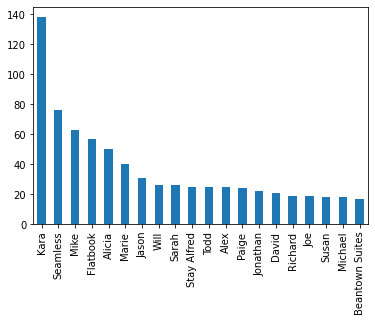

In [61]:
#number of listings per host
vals = df['host_name'].value_counts()
((vals[:20])).plot(kind="bar");

In [62]:
print(vals)

Kara        138
Seamless     76
Mike         63
Flatbook     57
Alicia       50
           ... 
Tomo          1
Praveen       1
Kelsey        1
Tao           1
Moon          1
Name: host_name, Length: 1299, dtype: int64


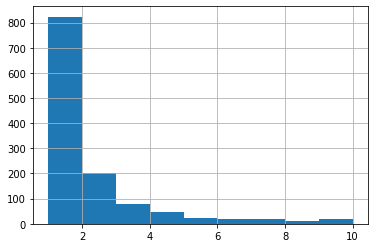

In [63]:
#histogram of number of listings
vals.hist(bins=[1,2,3,4,5,6,7,8,9,10]);

In [64]:
#filter for price and review rating per host
df_1 = df.groupby('host_name').filter(lambda x: len(x) > 1) #filter for hosts with more than one listing
df_1 = df_1.groupby(['host_name']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean"})
df_1 = df_1.sort_values("id", ascending=False)
print(df_1)


               id       price  review_scores_rating
host_name                                          
Kara          138  235.789855             85.096154
Seamless       76  296.868421             88.634921
Mike           63  277.126984             89.163265
Flatbook       57  213.894737             91.256410
Alicia         50  152.500000             91.361111
...           ...         ...                   ...
Jenna           2  141.000000                   NaN
Jeremy          2   91.000000             95.500000
Jill            2  192.500000             99.500000
Jim & Afiyah    2   72.500000             88.000000
英硕              2   75.000000                   NaN

[476 rows x 3 columns]


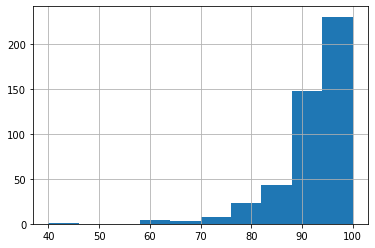

In [65]:
#histogram of mean review rating per host
df_1['review_scores_rating'].hist();

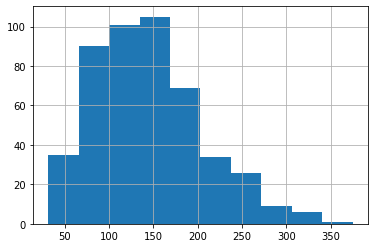

In [66]:
#histogram of mean price per host
df_1['price'].hist();

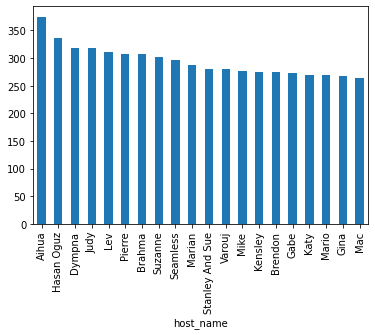

In [67]:
#mean price per host
df_1 = df_1.sort_values("price", ascending=False)
((df_1['price'][:20])).plot(kind="bar");

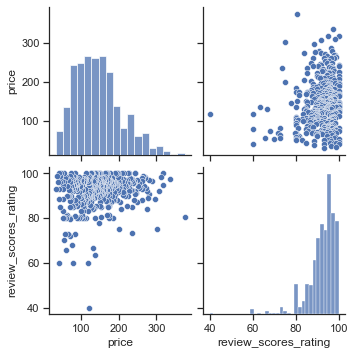

In [75]:

sns.set_theme(style="ticks")
sns.pairplot(df_1[['price','review_scores_rating']])